## GRAPPA g factor map 
###### Author: Zimu Huo
###### Date: 06.2022


This has the same sampling scheme as SENSE, so it is a more generalised version. Thus, the slice data and reference data are separated. 

-------------------------------------------------------------------------
References
    
    [1] 
    Author: Mark A. Griswold et al. 
    Title: General Formulation for Quantitative G-factorCalculation in GRAPPA Reconstructions
    Link: https://onlinelibrary.wiley.com/doi/epdf/10.1002/mrm.22066
    

In [1]:
import sys
sys.path.insert(1, '../')
import numpy as np
import matplotlib.pyplot as plt
from util.coil import *
import util.mask as undersample
from util.fft import *
import util.simulator as simulate
import util.phantom as phantom
from util.gfactor import *
from tqdm.notebook import tqdm
from util.zpad import *
from scipy import io
from util.twix import * 
import util.simulator as simulator
from util.sg import * 

In [2]:
indSlice = np.asarray([2], dtype = int)
numSlice = len(indSlice)
file_sms = "../lib/meas_MID00134_FID55501_catesain_4slices.dat"
file = readtwix(file_sms)
acc = file[0]['readouts']
ny, nx, nc , ns = acc.shape

Software version: VD/VE (!?)

Scan  0
100 % parsed in 0 s. Estimated 0 s remaining.
WARNING more than one slice. Taking first one..
Scan  1
100 % parsed in 1 s. Estimated 0 s remaining.
----------------------------------------------------------------------------------------------------
reading raw data, calculating trajectories and sampling raster 


  0%|          | 0/1063 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
file parsed
----------------------------------------------------------------------------------------------------
loading and preprocessing the data..
----------------------------------------------------------------------------------------------------
dynamically combining data according to dtype, sli, par, rep..


  0%|          | 0/4 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
finished, the output is stored in a list format and each element of the list is a dictionary.
To access the data, use file[idx]["readout"] or file[idx]["flags"]
                                                                                                    
idx  file type
0   DATA


In [4]:
from tqdm import tqdm
nt = 100
sample_rate = nt
leakage = np.zeros((ny, nx, ns, nt), dtype = complex)
for i in tqdm(range(nt)):
    cycle = np.arange(0,1,1/ns) * 2* np.pi
    shift = cycle*ny/(2*np.pi)
    fakeacc = np.zeros(acc.shape, dtype = complex)
    fakeacc[...,0]= (1+0.1*np.cos(2*4*1*np.pi*i/sample_rate))*acc[...,0]
    fakeacc[...,1]= (1+0.1*np.cos(2*4*2*np.pi*i/sample_rate))*acc[...,1]
    fakeacc[...,2]= (1+0.1*np.cos(2*4*3*np.pi*i/sample_rate))*acc[...,2]
    fakeacc[...,3]= (1+0.1*np.cos(2*4*4*np.pi*i/sample_rate))*acc[...,3]
    fakembdata = np.sum(fakeacc,-1)
    recon = sg(fakembdata,simulator.acs(fakeacc,(32,32)))
    #leakage[...,i] =  np.mean(ifft2c(recon), 2)
    leakage[...,i] =  rsos(ifft2c(recon))

100%|█████████████████████████████████████████| 100/100 [37:28<00:00, 22.49s/it]


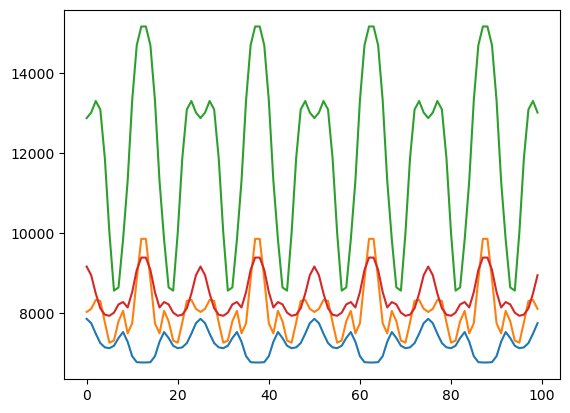

In [5]:
plt.plot(np.abs((leakage[60,60,0,:])))
plt.plot(np.abs((leakage[60,60,1,:])))
plt.plot(np.abs((leakage[60,60,2,:])))
plt.plot(np.abs((leakage[60,60,3,:])))

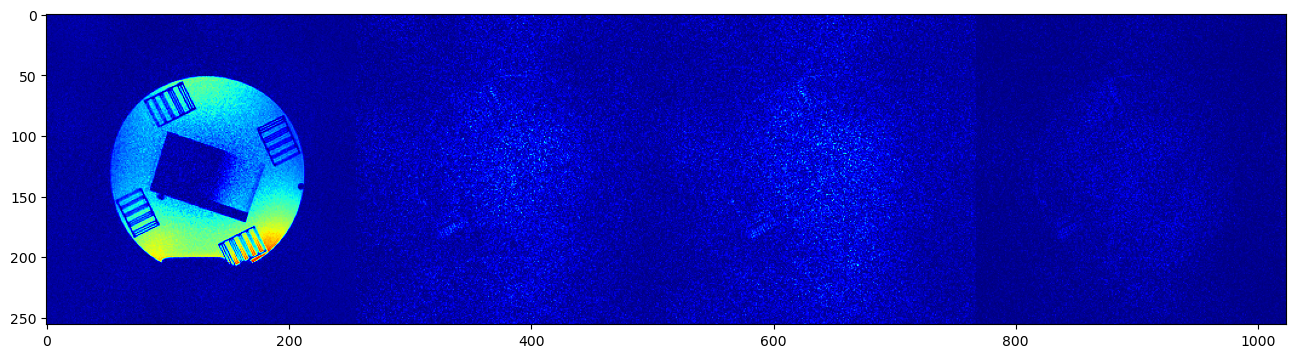

In [6]:
ns = 4
maps = np.zeros([ny, nx, ns], dtype = complex)
f = [54]
for y in range(ny):
    for x in range(nx):
            maps[y,x, 0] = np.sum(np.abs((fft(leakage[y,x,0,:]))[f]))
            maps[y,x, 1] = np.sum(np.abs((fft(leakage[y,x,1,:]))[f]))
            maps[y,x, 2] = np.sum(np.abs((fft(leakage[y,x,2,:]))[f]))
            maps[y,x, 3] = np.sum(np.abs((fft(leakage[y,x,3,:]))[f]))
maps1 = maps
plt.figure(figsize = (16,12))
plt.imshow(np.abs(maps1).reshape(ny,-1, order = "F"), cmap = "jet")
plt.show()          

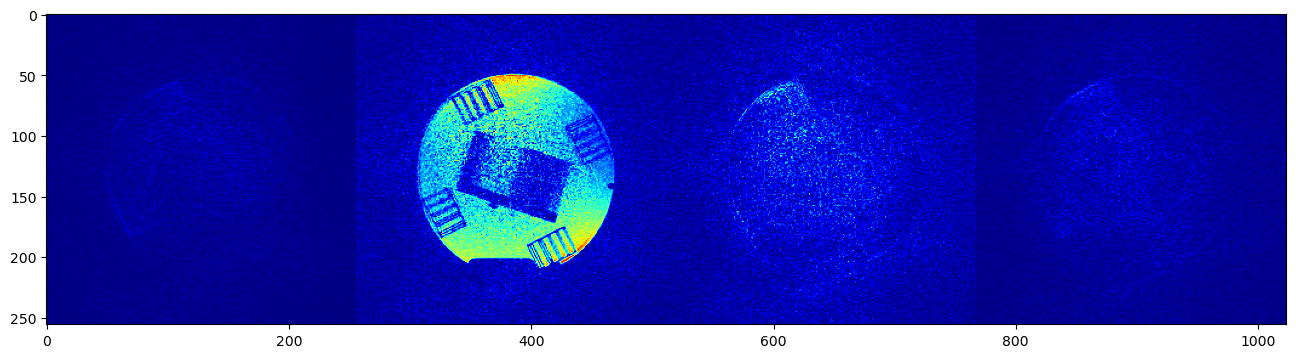

In [7]:
ns = 4
maps = np.zeros([ny, nx, ns], dtype = complex)
f = [58]
for y in range(ny):
    for x in range(nx):
            maps[y,x, 0] = np.sum(np.abs((fft(leakage[y,x,0,:]))[f]))
            maps[y,x, 1] = np.sum(np.abs((fft(leakage[y,x,1,:]))[f]))
            maps[y,x, 2] = np.sum(np.abs((fft(leakage[y,x,2,:]))[f]))
            maps[y,x, 3] = np.sum(np.abs((fft(leakage[y,x,3,:]))[f]))
maps2 = maps
plt.figure(figsize = (16,12))
plt.imshow(np.abs(maps2).reshape(ny,-1, order = "F"), cmap = "jet")
plt.show()          

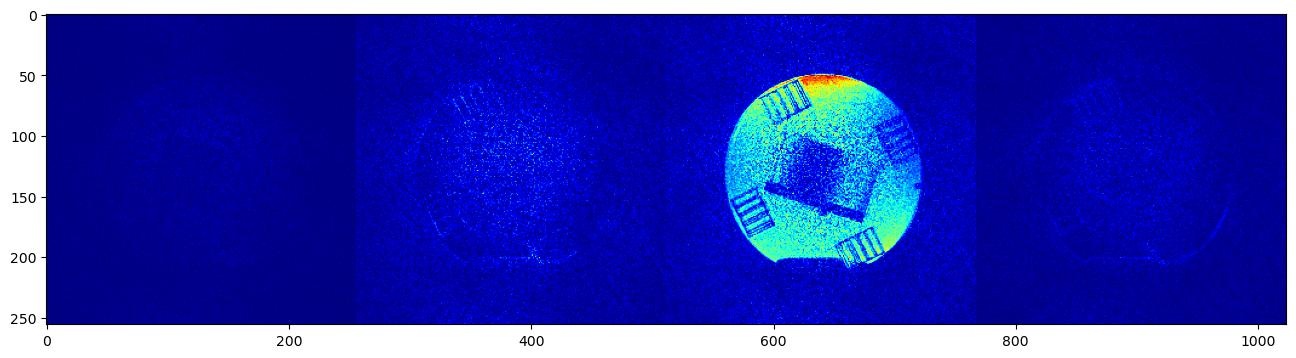

In [8]:
ns = 4
maps = np.zeros([ny, nx, ns], dtype = complex)
f = [62]
for y in range(ny):
    for x in range(nx):
            maps[y,x, 0] = np.sum(np.abs((fft(leakage[y,x,0,:]))[f]))
            maps[y,x, 1] = np.sum(np.abs((fft(leakage[y,x,1,:]))[f]))
            maps[y,x, 2] = np.sum(np.abs((fft(leakage[y,x,2,:]))[f]))
            maps[y,x, 3] = np.sum(np.abs((fft(leakage[y,x,3,:]))[f]))
maps3 = maps
plt.figure(figsize = (16,12))
plt.imshow(np.abs(maps3).reshape(ny,-1, order = "F"), cmap = "jet")
plt.show()          

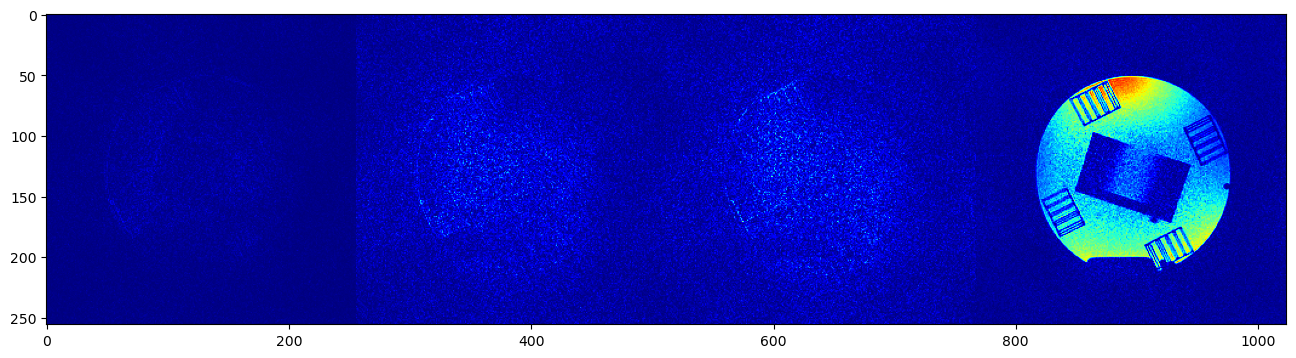

In [9]:
ns = 4
maps = np.zeros([ny, nx, ns], dtype = complex)
f = [66]
for y in range(ny):
    for x in range(nx):
            maps[y,x, 0] = np.sum(np.abs((fft(leakage[y,x,0,:]))[f]))
            maps[y,x, 1] = np.sum(np.abs((fft(leakage[y,x,1,:]))[f]))
            maps[y,x, 2] = np.sum(np.abs((fft(leakage[y,x,2,:]))[f]))
            maps[y,x, 3] = np.sum(np.abs((fft(leakage[y,x,3,:]))[f]))

maps4 = maps
plt.figure(figsize = (16,12))
plt.imshow(np.abs(maps4).reshape(ny,-1, order = "F"), cmap = "jet")
plt.show()          

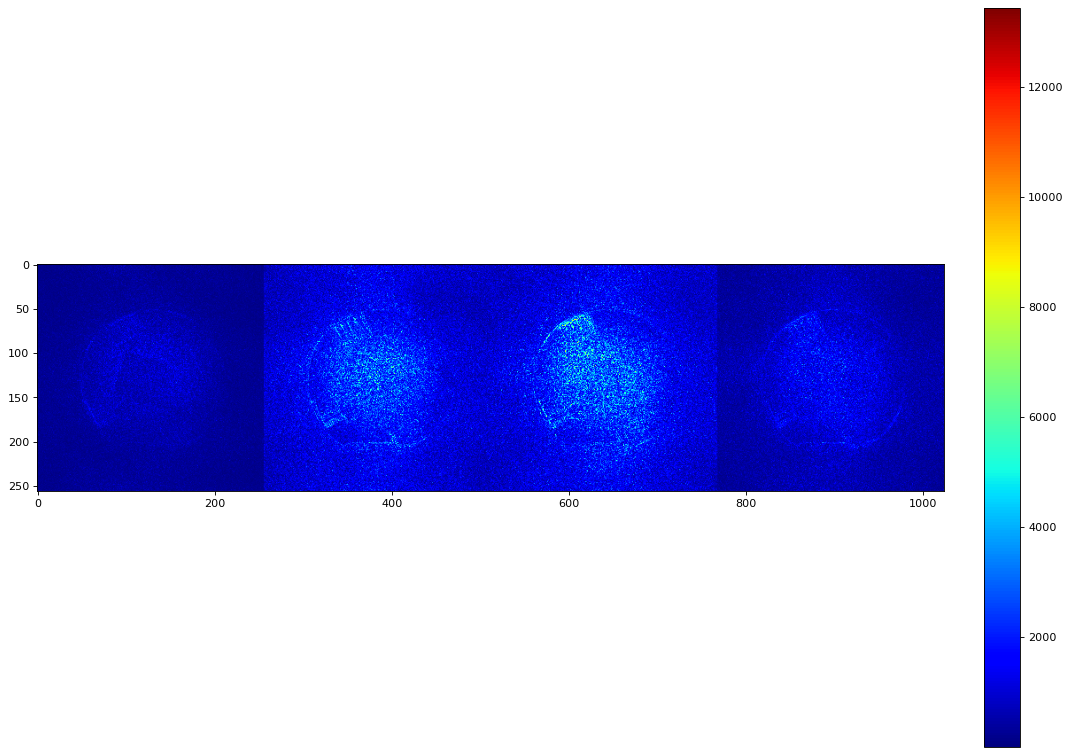

In [10]:
slice1 = maps2[:,:,0] + maps3[:,:,0]+maps4[:,:,0]
slice2 = maps1[:,:,1] + maps3[:,:,1]+maps4[:,:,1]
slice3 = maps1[:,:,2] + maps2[:,:,2]+maps4[:,:,2]
slice4 = maps1[:,:,3] + maps2[:,:,3]+maps3[:,:,3]
plt.figure(figsize = (16,12),dpi=80)
tf = plt.imshow(np.abs(np.concatenate((slice1, slice2, slice3, slice4),-1)).reshape(ny,-1, order = "F"),cmap='jet')
plt.colorbar(tf, fraction=0.046, pad=0.04)